### Libraries and Modules

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io
from PIL import Image

# Modules
from RICM_VESICLE import RICM
from FITTING import Fit_Gaussian

### Determine the Shot and the GUV


In [2]:
# Determine the Shot and the GUV
experiment = '202210215_GUV_Bio5_SOPC5'
shot, guv = 9, 2

### Read the whole RICM image to determine the base line

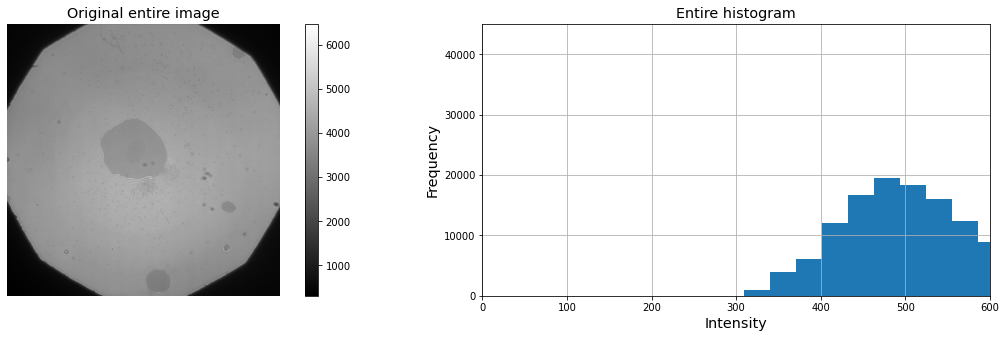

In [3]:
# Read the RICM image
RICM_img = io.imread(f"Data/{experiment}/data/AVG_vesicle_{shot}_MMStack_Default.ome.tif")

# display the image and it's histogram
plt.figure(figsize=(20,5))

plt.subplot(121)
plt.axis('off')
plt.title('Original entire image', fontsize='x-large')
plt.imshow(RICM_img, cmap = "gray")
plt.colorbar()

plt.subplot(122)
plt.title('Entire histogram', fontsize='x-large')
plt.hist(RICM_img.ravel(), bins = 200)
plt.xlabel('Intensity', fontsize='x-large')
plt.ylabel('Frequency', fontsize='x-large')
plt.xlim(0,600)
plt.grid();

### Read the GUV image and subtract the base line

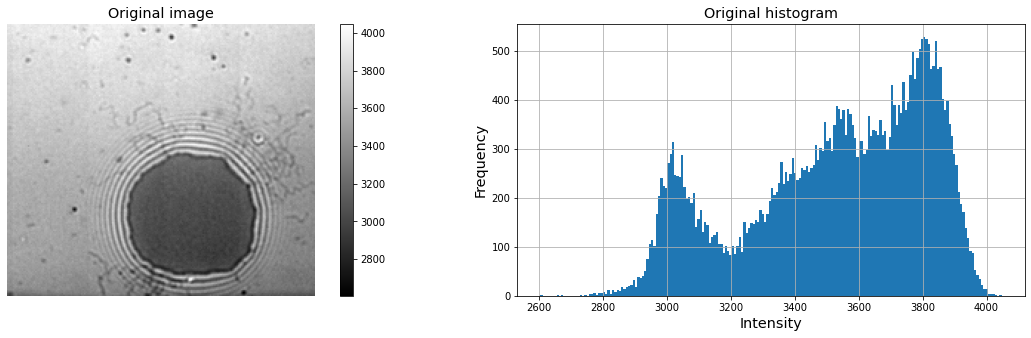

In [4]:
# Read the GUV image
img = io.imread(f"Data/{experiment}/data/AVG_vesicle_{shot}_MMStack_Default.ome-{guv}.tif")

# Subtract the base line
img = img - 310

# display the image and it's histogram
plt.figure(figsize=(20,5))

plt.subplot(121)
plt.axis('off')
plt.title('Original image', fontsize='x-large')
plt.imshow(img, cmap = "gray")
plt.colorbar();

plt.subplot(122)
plt.title('Original histogram', fontsize='x-large')
plt.xlabel('Intensity', fontsize='x-large')
plt.ylabel('Frequency', fontsize='x-large')
plt.hist(img.ravel(), bins = 200)
#plt.xlim(70,87)
plt.grid();

### Define the RICM model

Y0 = 0.01, A = 0.24, h0 = 32.11
Y0 = 0.01, A = 0.24, h0 = 32.11


/home/ahmed/Repositories/Membrane-Topography/RICM_VESICLE.py:255: RuntimeWarning: invalid value encountered in arccos
  return (self.l / (4 * np.pi * self.n_outer)) * np.arccos((Y0 - img_background_normalized) / A) + h0


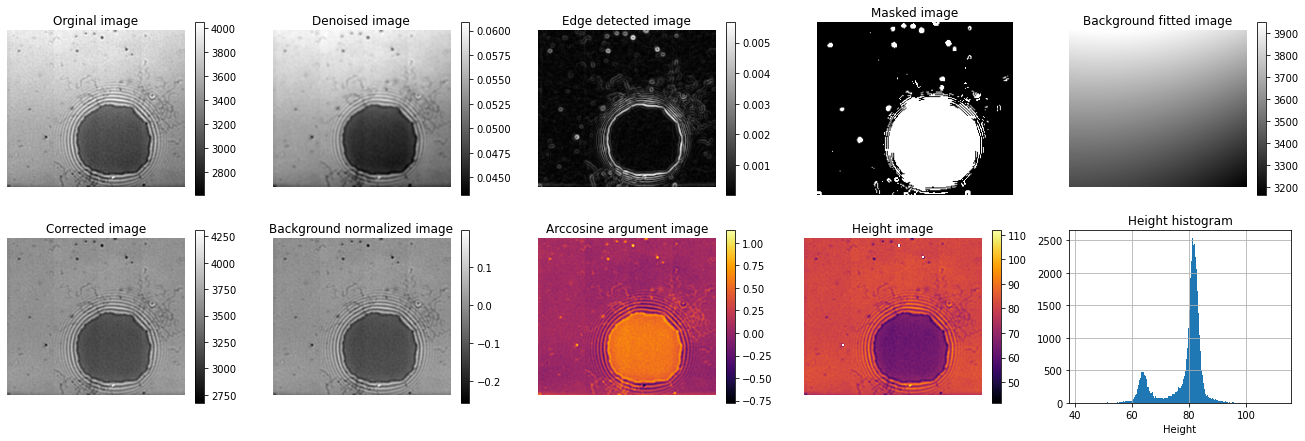

Y0 = 0.01, A = 0.24, h0 = 32.11


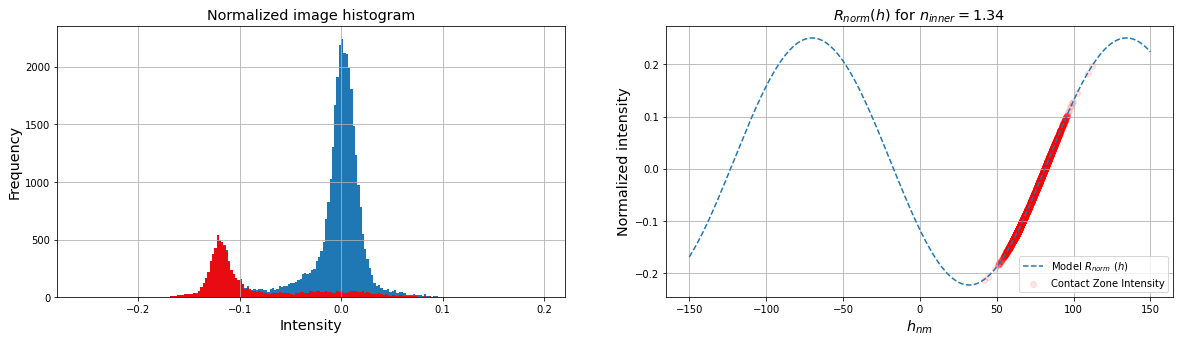

In [5]:
# Define the Height range
h = np.linspace(-150, 150, 600)

# Define the RICM class with certain n_inner
ricm = RICM(img, n_inner = 1.344, hole = 3)

# Display the way to the RICM height mapping step by step
ricm.show_summary()

# Define the Normalized intensity, heghiet
I_norm = ricm.background_normalization()
Height = ricm.height(h)
Mask = ricm.mask()

# Get the intensity vs height on the contact zone                    
I_norm_img = []
h_img = []
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if Mask[i,j] == 1:     # only the contact zone
            I_norm_img.append(I_norm[i,j])
            h_img.append(Height[i,j])

# Convert the lists to numpy arrays
I_norm_img = np.array(I_norm_img)
h_img = np.array(h_img)

# Normalized image 
plt.figure(figsize=(20,5))

# The histogram of the normalized image
plt.subplot(121)
plt.hist(ricm.background_normalization().ravel(), bins = 200)
plt.hist(I_norm_img.ravel(), bins = 200, color = 'r', alpha = 0.9)
plt.title('Normalized image histogram', fontsize='x-large')
plt.xlabel('Intensity', fontsize='x-large')
plt.ylabel('Frequency', fontsize='x-large')
plt.grid()

plt.subplot(122)
plt.plot(h, ricm.R5_norm(h), '--', label = "Model $R_{norm}\ (h)$")
plt.scatter(h_img, I_norm_img, color = 'r', alpha = 0.1, label = "Contact Zone Intensity")
plt.title("$R_{norm}(h)$ for $n_{inner} = 1.34$ ", fontsize='x-large')
plt.xlabel("$h_{nm}$", fontsize='x-large')
plt.ylabel("Normalized intensity", fontsize='x-large')
plt.legend()
plt.grid()

# Show the results
plt.show()

### Display the height image and it's histogram

Y0 = 0.01, A = 0.24, h0 = 32.11
The height of the GUV is 63.82 nm


/home/ahmed/Repositories/Membrane-Topography/RICM_VESICLE.py:255: RuntimeWarning: invalid value encountered in arccos
  return (self.l / (4 * np.pi * self.n_outer)) * np.arccos((Y0 - img_background_normalized) / A) + h0


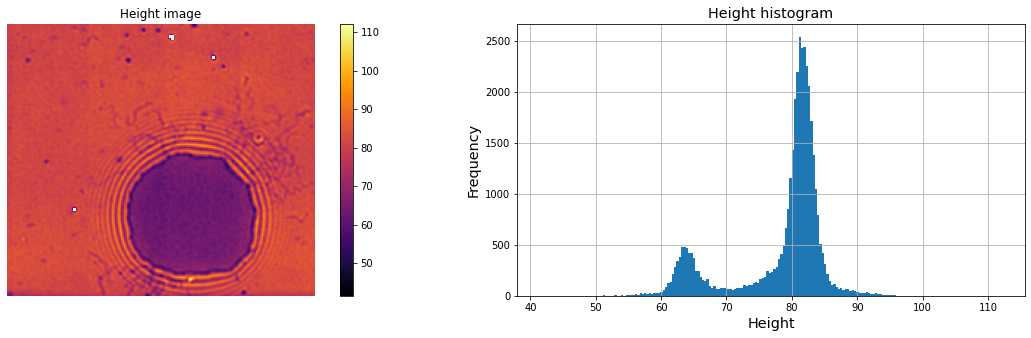

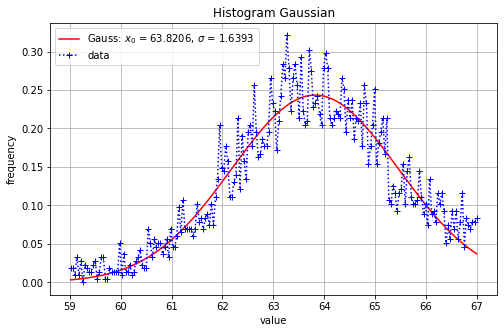

In [6]:
img_height = ricm.height()

# display the image and it's histogram
plt.figure(figsize=(20,5))

plt.subplot(121)
plt.axis('off')
plt.title('Height image')
plt.imshow(img_height, cmap = "inferno")
plt.colorbar();

plt.subplot(122)
plt.title('Height histogram', fontsize='x-large')
plt.xlabel('Height', fontsize='x-large')
plt.ylabel('Frequency', fontsize='x-large')
plt.hist(img_height.ravel(), bins = 200)
#plt.xlim(70,87)
plt.grid();

# Cut the peak of the adhesion zone
adhesion = []
for i in img_height.ravel():
    if i > 59 and i < 67 :
        adhesion.append(i)
        
# Fit a gaussian on the adhesion zone histogram
gauss = Fit_Gaussian(adhesion, normalized=True)
height, _ = gauss.hist_fitting(show = True)

# Print the height in nano meter
print(f'The height of the GUV is {height:.2f} nm')

### Save the images in tif format

In [7]:
# Create the results directory
os.mkdir(f'Data/{experiment}/results/AVG_vesicle_{shot}_MMStack_Default.ome-{guv}_{height:.2f}nm')

# Save the results
Image.fromarray(img).save(
    f'Data/{experiment}/results/AVG_vesicle_{shot}_MMStack_Default.ome-{guv}_{height:.2f}nm/original.tif')
Image.fromarray(ricm.nl_denoise()).save(
    f'Data/{experiment}/results/AVG_vesicle_{shot}_MMStack_Default.ome-{guv}_{height:.2f}nm/nl_denoise.tif')
Image.fromarray(ricm.edge_detection()).save(
    f'Data/{experiment}/results/AVG_vesicle_{shot}_MMStack_Default.ome-{guv}_{height:.2f}nm/edge_detection.tif')
Image.fromarray(ricm.mask()).save(
    f'Data/{experiment}/results/AVG_vesicle_{shot}_MMStack_Default.ome-{guv}_{height:.2f}nm/mask.tif')
Image.fromarray(ricm.background_fitting()).save(
    f'Data/{experiment}/results/AVG_vesicle_{shot}_MMStack_Default.ome-{guv}_{height:.2f}nm/background_fitting.tif')
Image.fromarray(ricm.correct()).save(
    f'Data/{experiment}/results/AVG_vesicle_{shot}_MMStack_Default.ome-{guv}_{height:.2f}nm/correct.tif')
Image.fromarray(ricm.background_normalization()).save(
    f'Data/{experiment}/results/AVG_vesicle_{shot}_MMStack_Default.ome-{guv}_{height:.2f}nm/background_normalization.tif')
Image.fromarray(ricm.height()).save(
    f'Data/{experiment}/results/AVG_vesicle_{shot}_MMStack_Default.ome-{guv}_{height:.2f}nm/height.tif')

Y0 = 0.01, A = 0.24, h0 = 32.11


/home/ahmed/Repositories/Membrane-Topography/RICM_VESICLE.py:255: RuntimeWarning: invalid value encountered in arccos
  return (self.l / (4 * np.pi * self.n_outer)) * np.arccos((Y0 - img_background_normalized) / A) + h0
